# GAN Training

## imports

In [71]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from models.GAN import GAN
from utils.loaders import load_safari

from PIL import Image
from numpy import asarray


In [73]:
directory = 'data/datasetdrawing
'
count = 0
for filename in os.listdir(directory):
    count+=1
    
dataset = np.zeros([count,28*28])
count = 0

for filename in os.listdir(directory):
    f = os.path.join(directory,filename)
    # load the image
    im = np.array(Image.open(f).convert('L')) #you can pass multiple arguments in single line
    # create Pillow image
    image2 = Image.fromarray(im)
    
    # Resize image and convert in greycolor
    load_img_rz = np.array(Image.fromarray(im).resize((28,28)))
    # Save the image in jpeg
    Image.fromarray(load_img_rz).save('r_'+filename)
    
    image2 = Image.fromarray(load_img_rz)
    
    x = np.zeros([1,load_img_rz.size])
    k = 0
    for i in range(28):
        for j in range(28):
            x[0,k] = load_img_rz[i,j]
            k+=1
    dataset[count,:] = x[0,:]
    count +=1        


np.save('./data/dataset.npy', dataset)

In [74]:
# run params
SECTION = 'gan'
RUN_ID = '0001'
DATA_NAME = 'drawing'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #


## data

In [75]:
(x_train, y_train) = load_safari(DATA_NAME)

In [76]:
x_train.shape

(128, 28, 28, 1)

In [77]:
plt.imshow(x_train[200,:,:,0], cmap = 'gray')

IndexError: index 200 is out of bounds for axis 0 with size 128

## architecture

In [78]:
gan = GAN(input_dim = (28,28,1)
        , discriminator_conv_filters = [64,64,128,128]
        , discriminator_conv_kernel_size = [5,5,5,5]
        , discriminator_conv_strides = [2,2,2,1]
        , discriminator_batch_norm_momentum = None
        , discriminator_activation = 'relu'
        , discriminator_dropout_rate = 0.4
        , discriminator_learning_rate = 0.0008
        , generator_initial_dense_layer_size = (7, 7, 64)
        , generator_upsample = [2,2, 1, 1]
        , generator_conv_filters = [128,64, 64,1]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [1,1, 1, 1]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0004
        , optimiser = 'rmsprop'
        , z_dim = 100
        )

if mode == 'build':
    gan.save(RUN_FOLDER)
else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

/Users/leogenot/miniforge3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [79]:
gan.discriminator.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa [(None, 28, 28, 1)]       0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 14, 14, 64)        1664      
_________________________________________________________________
activation_36 (Activation)   (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 7, 7, 64)          102464    
_________________________________________________________________
activation_37 (Activation)   (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 7, 7, 64)          0  

In [80]:
gan.generator.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) [(None, 100)]             0         
_________________________________________________________________
dense_9 (Dense)              (None, 3136)              316736    
_________________________________________________________________
batch_normalization_16 (Batc (None, 3136)              12544     
_________________________________________________________________
activation_40 (Activation)   (None, 3136)              0         
_________________________________________________________________
reshape_4 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d_8 (UpSampling2 (None, 14, 14, 64)        0         
_________________________________________________________________
generator_conv_0 (Conv2D)    (None, 14, 14, 128)       204

## training

In [81]:
BATCH_SIZE = 90
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 5

In [82]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
)

2022-01-10 21:38:47.050003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-10 21:38:47.403666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-10 21:38:47.928610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


0 [D loss: (0.718)(R 0.701, F 0.736)] [D acc: (0.122)(0.244, 0.000)] [G loss: 0.683] [G acc: 1.000]
1 [D loss: (0.688)(R 0.668, F 0.708)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.666] [G acc: 1.000]
2 [D loss: (2.468)(R 0.455, F 4.480)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.642] [G acc: 1.000]
3 [D loss: (0.766)(R 0.508, F 1.023)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.617] [G acc: 1.000]
4 [D loss: (0.623)(R 0.552, F 0.694)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.559] [G acc: 1.000]
5 [D loss: (0.597)(R 0.502, F 0.693)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.431] [G acc: 1.000]
6 [D loss: (0.685)(R 0.412, F 0.959)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.422] [G acc: 1.000]
7 [D loss: (0.741)(R 0.430, F 1.052)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.496] [G acc: 1.000]
8 [D loss: (0.773)(R 0.507, F 1.039)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.579] [G acc: 1.000]
9 [D loss: (0.733)(R 0.587, F 0.880)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.611] [G acc: 1.000]


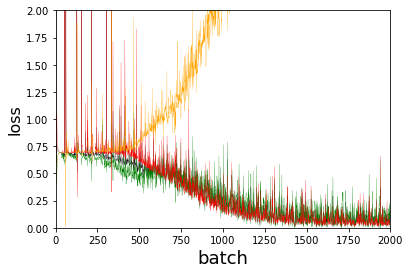

In [83]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[0] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 2000)
plt.ylim(0, 2)

plt.show()


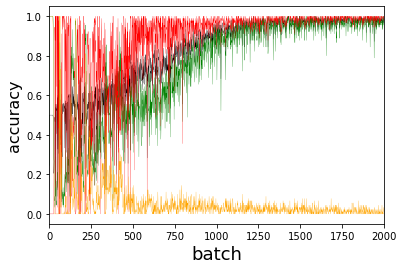

In [84]:
fig = plt.figure()
plt.plot([x[3] for x in gan.d_losses], color='black', linewidth=0.25)
plt.plot([x[4] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[5] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[1] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('accuracy', fontsize=16)

plt.xlim(0, 2000)

plt.show()